# Email Spam Detection with Machine Learning

***1.1 Importing libraries in this enviroment.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***1.2 Importing skleran models for prediction.***

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


***2.1 Reading the "spam (1).csv" dataset using python's pandas libraries.***

In [3]:
spam = pd.read_csv("spam (1).csv",encoding = 'ISO-8859-1')

In [4]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
shape =spam.shape
shape

(5572, 5)

The above dataframe shows that 3rd, 4th, and 5th column doesn't contain any data. So, dropping these columns.

In [6]:
spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True,axis =1)

In [7]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<font color='red'>!!! </font>Columns dropped successfully.


***2.2 Change the columns name corresponding to the data it contains.***

In [8]:
spam.columns = ['type','message']

In [9]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


***2.3 Removing duplicates from the dataset.***

In [10]:
spam.drop_duplicates(inplace = True)

In [11]:
new = spam.shape
new

(5169, 2)

In [12]:
duplicates = shape[0]-new[0]
print("Numbers of duplicates :",duplicates)

Numbers of duplicates : 403


***2.4 Statistical measure of the dataset.***

In [13]:
spam.describe()

,type,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [14]:
spam['type'].value_counts()

type
ham     4516
spam     653
Name: count, dtype: int64

Text(0.5, 1.0, 'Mail Received Types')

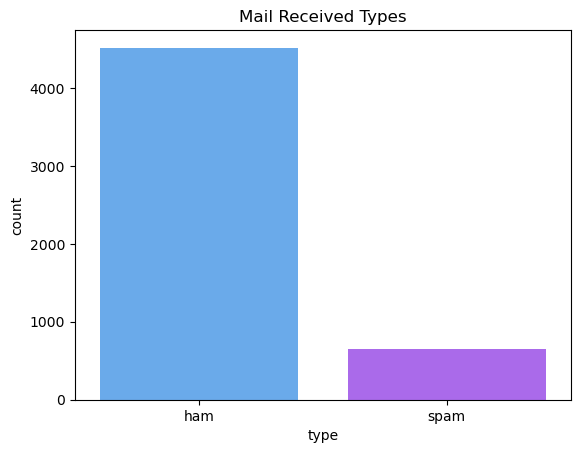

In [15]:
sns.countplot(x='type',data =spam,palette = 'cool')
plt.title('Mail Received Types')

***3.1 Data preparing for models.***

In [16]:
lb = LabelEncoder()

In [17]:
spam['type'] =lb.fit_transform(spam['type'])

In [18]:
spam['type'].value_counts()

type
0    4516
1     653
Name: count, dtype: int64

In [19]:
X = spam['message']
y =spam['type']

* Splitting the dataset into four parts X_train, X_test, y_train, y_test.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [21]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_new = feature_extraction.fit_transform(X_train)
X_test_new = feature_extraction.transform(X_test)

In [22]:
print(X_train.shape , X_test.shape)
print(y_train.shape, y_test.shape)

(4135,) (1034,)
(4135,) (1034,)


***3.2 Naive Bayes's model buliding , training and testing.**

In [23]:
nv =MultinomialNB()
nv.fit(X_train_new,y_train)

MultinomialNB()

In [24]:
y_nv = nv.predict(X_test_new)

In [25]:
print('Accuracy of the Navie Bayes Model on the trian dataset: {:0.2f}%'.format((nv.score(X_train_new,y_train)*100)))

Accuracy of the Navie Bayes Model on the trian dataset: 97.87%


In [26]:
print('Accuracy of the Navie Bayes Model on the test dataset: {:0.2f}%'.format((nv.score(X_test_new,y_test)*100)))

Accuracy of the Navie Bayes Model on the test dataset: 96.62%


Text(0.5, 1.0, 'Confusion Matix')

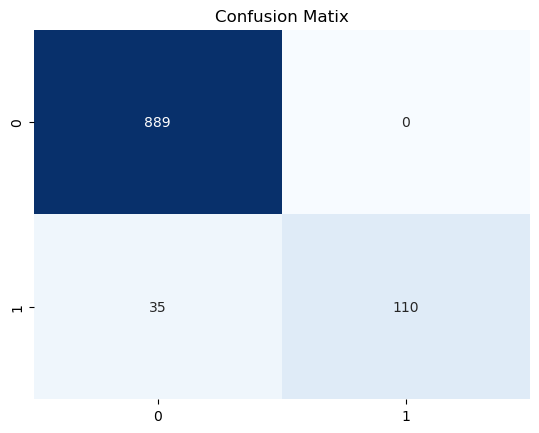

In [27]:
cm_nv =confusion_matrix(y_test,y_nv)
sns.heatmap(cm_nv,annot =True,fmt ='d',cmap= 'Blues',cbar =False)
plt.title("Confusion Matix")


In [28]:
print("Classification Report of Navie Bayes Model :\n\n",classification_report(y_test,y_nv))

Classification Report of Navie Bayes Model :

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



***3.3 Logistic Regression model building, training and testing.***

In [29]:
lm = LogisticRegression()

In [30]:
lm.fit(X_train_new,y_train)

LogisticRegression()

In [31]:
y_lm = lm.predict(X_test_new)

In [32]:
print('Accuracy of Logistic Regression on the trian data: {:0.2f}%'.format((lm.score(X_train_new,y_train)*100)))

print('Accuracy of Logistic Regression on the test data: {:0.2f}%'.format((lm.score(X_test_new,y_test)*100)))

Accuracy of Logistic Regression on the trian data: 96.13%
Accuracy of Logistic Regression on the test data: 96.42%


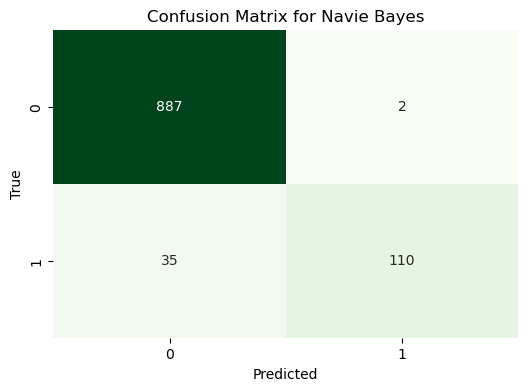

In [33]:
cm_lm = confusion_matrix(y_test, y_lm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lm, annot=True, fmt="d", cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Navie Bayes')
plt.show()

In [34]:
print("Classification Report of Logistic Regerssion Model :\n\n",classification_report(y_test,y_lm))

Classification Report of Logistic Regerssion Model :

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.76      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034



***3.4 Random Forest Classifer model building, training and testing.***

In [35]:
forest = RandomForestClassifier()

In [36]:
forest.fit(X_train_new,y_train)

RandomForestClassifier()

In [37]:
y_for =forest.predict(X_test_new)

In [38]:
print('Accuracy of Random Forest Classifier on the trian data: {:0.1f}%'.format((forest.score(X_train_new,y_train)*100)))
print('Accuracy of Random Forest Classifier on the test data: {:0.2f}%'.format((forest.score(X_test_new,y_test)*100)))

Accuracy of Random Forest Classifier on the trian data: 100.0%
Accuracy of Random Forest Classifier on the test data: 97.10%


Text(50.722222222222214, 0.5, 'True')

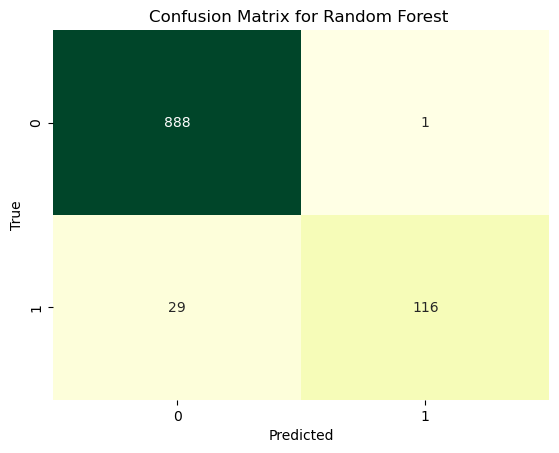

In [39]:
cm_for = confusion_matrix(y_test,y_for)
sns.heatmap(cm_for, annot =True,cmap ='YlGn',fmt='d', cbar =False)
plt.title("Confusion Matrix for Random Forest ")
plt.xlabel('Predicted')
plt.ylabel('True')

In [40]:
print("Classification Report of Random Forest Model :\n\n",classification_report(y_test,y_for))

Classification Report of Random Forest Model :

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



***3.5 Decision Tree Classifier model building, training, and testing.***

In [41]:
tree = DecisionTreeClassifier()

In [42]:
tree.fit(X_train_new,y_train)
y_tree =tree.predict(X_test_new)

In [43]:
print("Accuracy of the Decision Tree Classifier on train set: {:0.1f}%".format(tree.score(X_train_new,y_train)*100))
print("Accuracy of the Decision Tree Classifier on test set: {:0.2f}%".format(tree.score(X_test_new,y_test)*100))

Accuracy of the Decision Tree Classifier on train set: 100.0%
Accuracy of the Decision Tree Classifier on test set: 96.32%


Text(50.722222222222214, 0.5, 'True')

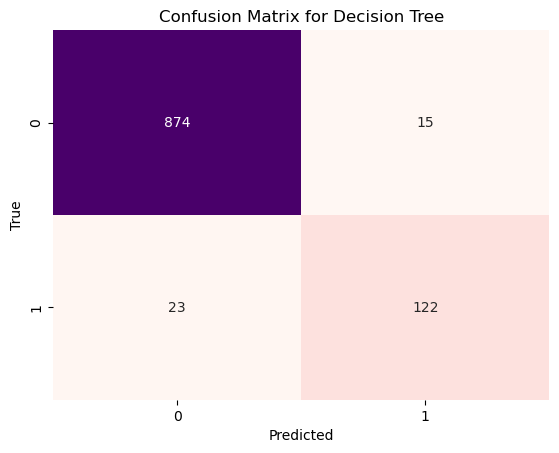

In [44]:
cm_tree = confusion_matrix(y_test,y_tree)
sns.heatmap(cm_tree, annot =True, fmt ='d', cbar= False, cmap = 'RdPu')
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('True')

In [45]:
print("Classification Report of Decision Tree Model :\n\n",classification_report(y_test,y_tree))

Classification Report of Decision Tree Model :

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       889
           1       0.89      0.84      0.87       145

    accuracy                           0.96      1034
   macro avg       0.93      0.91      0.92      1034
weighted avg       0.96      0.96      0.96      1034



***3.6 Gradient Boosting Classifer model building, training and testing.***

In [46]:
boost =GradientBoostingClassifier()

In [47]:
boost.fit(X_train_new,y_train)
y_boost = boost.predict(X_test_new)

In [48]:
print("Accuracy of the Gradient Boosting on train set: {:0.2f}%".format(boost.score(X_train_new,y_train)*100))
print("Accuracy of the Gradient Boosting on test set: {:0.2f}%".format(boost.score(X_test_new,y_test)*100))

Accuracy of the Gradient Boosting on train set: 97.39%
Accuracy of the Gradient Boosting on test set: 96.23%


Text(50.722222222222214, 0.5, 'True')

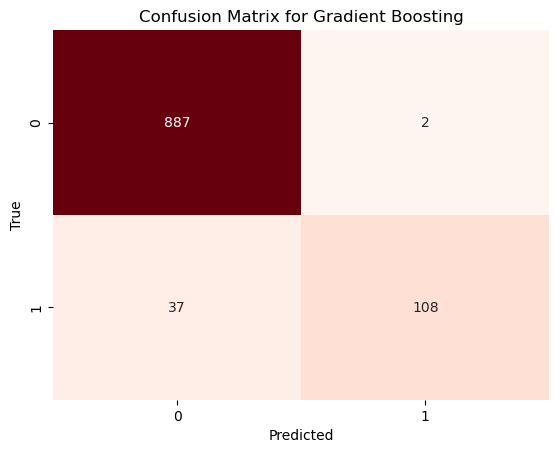

In [49]:
cm_boost = confusion_matrix(y_test,y_boost)
sns.heatmap(cm_boost,annot= True,cbar = False, fmt ='d',cmap = 'Reds')
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel('Predicted')
plt.ylabel('True')

In [50]:
print("Classification Report of Gradient Boosting model :\n\n", classification_report(y_test,y_boost))

Classification Report of Gradient Boosting model :

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.74      0.85       145

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



**4. Conclusion**

From all the above models, Radom Forest Classifier model gives precise output.

# !!! Thank You.